# Importing libraries & Loading Dataset

Assessment Tasks:

The following tasks are required in the coursework:

(1) Implement exploratory data analysis and gain an understanding of the data set and
its features. These concepts will be covered as part of the module content.

(2) Implement cluster analysis and understand the characteristics of developers in each
cluster.

(3) Implement classification and build machine learning models for predicting whether
a developer is in high income (compensation) based on developers’ information.

Note: for developers in this data set, low compensation is defined as annual
compensation less than $50,000, otherwise, as high compensation. The
compensation is provided in different denominations based on the developer’s
location. However, the converted value in USD is in column the CF:
ConvertedCompYearly

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
survey = pd.read_csv("/content/drive/MyDrive/Bhagyesh Docs /Masters/Assessment /survey_results_public.csv")

# Displaying the first few rows of the dataset
survey.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
# DataTypes of the columns
print(survey.dtypes,"\n")

ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
Employment              object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object 



In [ ]:
survey.count()

ResponseId             89184
Q120                   89184
MainBranch             89184
Age                    89184
Employment             87898
                       ...  
ProfessionalTech       41783
Industry               36774
SurveyLength           86485
SurveyEase             86554
ConvertedCompYearly    48019
Length: 84, dtype: int64

In [ ]:

# Display the first 5 record in dataset
display(survey.head())

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
survey.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [ ]:
survey.nunique()

ResponseId             89184
Q120                       1
MainBranch                 6
Age                        8
Employment               106
                       ...  
ProfessionalTech         284
Industry                  12
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     8784
Length: 84, dtype: int64

In [ ]:
# Overview of data and composition
print(survey.shape,"\n")

(89184, 84) 



In [ ]:
survey = survey.rename({'ConvertedCompYearly' : 'Salary'}, axis = 1)

In [ ]:
survey = survey[survey['Salary'].notnull()]

In [ ]:
survey.isna().sum().sort_values(ascending = False)

AINextVery similar                     46571
AINextNeither different nor similar    44685
AINextSomewhat similar                 44639
AINextVery different                   41681
AIDevWantToWorkWith                    37357
                                       ...  
Country                                    0
EdLevel                                    0
Age                                        0
MainBranch                                 0
Salary                                     0
Length: 84, dtype: int64

# Features Engineering

In [ ]:
# Selecting the relevent features
survey_data = survey[['Age', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCodePro', 'WorkExp', 'DevType', 'Country', 'ProfessionalTech' ,'Salary']]

# Exploratory Data Analysis

**Data Understanding**

In [ ]:
# Display the first few records of the dataset
survey_data.head()

,Age,Employment,RemoteWork,EdLevel,YearsCodePro,WorkExp,DevType,Country,ProfessionalTech,Salary
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,10.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,DevOps function;Microservices;Automated testin...,285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,23.0,"Developer, back-end",United States of America,DevOps function;Microservices;Automated testin...,250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,7.0,"Developer, front-end",United States of America,Automated testing;Continuous integration (CI) ...,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,6.0,"Developer, full-stack",Philippines,Microservices;Automated testing;Observability ...,23456.0
5,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,22.0,"Developer, back-end",United Kingdom of Great Britain and Northern I...,DevOps function;Microservices;Observability to...,96828.0


In [ ]:
# Check the Null values in DataFrame
survey_data.isna().sum()

Age                     0
Employment             12
RemoteWork             79
EdLevel                 0
YearsCodePro          194
WorkExp             15381
DevType               115
Country                 0
ProfessionalTech    16293
Salary                  0
dtype: int64

In [ ]:
survey_data.describe()

,WorkExp,Salary
count,32638.000000,4.801900e+04
mean,11.438691,1.031101e+05
std,8.822196,6.814188e+05
min,0.000000,1.000000e+00
25%,5.000000,4.390700e+04
50%,9.000000,7.496300e+04
75%,16.000000,1.216410e+05
max,50.000000,7.435143e+07


In [ ]:
survey_data.dtypes

Age                  object
Employment           object
RemoteWork           object
EdLevel              object
YearsCodePro         object
WorkExp             float64
DevType              object
Country              object
ProfessionalTech     object
Salary              float64
dtype: object

In [ ]:
# checking if there are empty  cells besides NAN values
for i in survey_data:
    print(f"{i} : {(survey_data[i]== '').sum()}")

Age : 0
Employment : 0
RemoteWork : 0
EdLevel : 0
YearsCodePro : 0
WorkExp : 0
DevType : 0
Country : 0
ProfessionalTech : 0
Salary : 0


In [ ]:
# Creating a new Categorical feature 'Compensation Salary' based on 'Salary' column

survey_data['CompensationSalary'] = survey_data['Salary'].apply(lambda x: 'Low' if x < 50000 else 'High') #if the salary is less than $50,000, categorize as Low, and otherwise categorize as 'High'

In [ ]:
# Dropping the 'Salary' Column from the survey_data

survey_data.drop('Salary', axis = 1)

,Age,Employment,RemoteWork,EdLevel,YearsCodePro,WorkExp,DevType,Country,ProfessionalTech,CompensationSalary
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,10.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,DevOps function;Microservices;Automated testin...,High
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,23.0,"Developer, back-end",United States of America,DevOps function;Microservices;Automated testin...,High
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,7.0,"Developer, front-end",United States of America,Automated testing;Continuous integration (CI) ...,High
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,6.0,"Developer, full-stack",Philippines,Microservices;Automated testing;Observability ...,Low
5,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,22.0,"Developer, back-end",United Kingdom of Great Britain and Northern I...,DevOps function;Microservices;Observability to...,High
...,...,...,...,...,...,...,...,...,...,...
89162,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,25.0,"Developer, back-end",Brazil,Automated testing;Developer portal or other ce...,High
89166,18-24 years old,"Employed, full-time;Independent contractor, fr...",In-person,Some college/university study without earning ...,2,3.0,"Developer, full-stack",Armenia,DevOps function;Microservices;Continuous integ...,Low
89167,18-24 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,2.0,"Developer, mobile",India,Automated testing,Low
89170,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,9.0,Other (please specify):,France,Automated testing;Observability tools;Innersou...,High


**Data Preparation**

In [ ]:
survey_data['Age'].unique()

array(['25-34 years old', '45-54 years old', '35-44 years old',
       'Under 18 years old', '55-64 years old', '18-24 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [ ]:
# Function to map Age categories to numerical values
def cleaned_age(x):

    if x == '25-34 years old':
        return 25
    if x == '45-54 years old':
        return 45
    if x == '35-44 years old':
        return 35
    if x == '55-64 years old':
        return 55
    if x == 'Under 18 years old':
        return 17
    if x == '65 years or older':
        return 65
    if x == 'Prefer not to say':
        return 0
    if x == '18-24 years old':
        return 18

# Apply the 'cleaned_age' function to the 'Age' column in the DataFrame
survey_data['Age']=survey_data['Age'].apply(cleaned_age)
# Count the accurance of each age value in the 'Age' column
survey_data['Age'].value_counts()

25    22163
35    13848
18     4922
45     4866
55     1795
65      339
17       56
0        30
Name: Age, dtype: int64

In [ ]:

# Filtering out rows where  'Age' is equal to 0 (Prefer Not to Say)
survey_data=survey_data[survey_data['Age']!=0]

# Count the accurance of each age value in the 'Age' column
survey_data['Age'].value_counts()

25    22163
35    13848
18     4922
45     4866
55     1795
65      339
17       56
Name: Age, dtype: int64

In [ ]:
# Display the Unique value from 'YearsCodePro' column
survey_data['YearsCodePro'].unique()

array(['9', '23', '7', '4', '21', '3', '15', 'Less than 1 year', '10',
       '2', '6', '14', '5', '19', '13', '16', '28', '30', '11', '8', '24',
       '40', '17', '29', '25', '12', '20', '18', '50', '27', '43', '26',
       '1', '38', '33', '22', '35', nan, '31', '34', '32', '37', '42',
       'More than 50 years', '36', '39', '41', '44', '48', '45', '46',
       '47', '49'], dtype=object)

In [ ]:
# Function to map 'YearsCodePro' categories to numerical values

def cleaned_exp(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return 0.5
    if x == "nan":
        return 0
    return float(x)

# Apply the 'cleaned_exp' function to the 'YearsCodePro' column in the DataFrame
survey_data['YearsCodePro']=survey_data['YearsCodePro'].apply(cleaned_exp)
survey_data['YearsCodePro'].unique()

array([ 9. , 23. ,  7. ,  4. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,  6. ,
       14. ,  5. , 19. , 13. , 16. , 28. , 30. , 11. ,  8. , 24. , 40. ,
       17. , 29. , 25. , 12. , 20. , 18. , 50. , 27. , 43. , 26. ,  1. ,
       38. , 33. , 22. , 35. ,  nan, 31. , 34. , 32. , 37. , 42. , 36. ,
       39. , 41. , 44. , 48. , 45. , 46. , 47. , 49. ])

In [ ]:
# Count the accurance of each age value in the 'ProfessionalTech' column

survey_data['ProfessionalTech'].value_counts()

None of these                                                                                                                                                                                           3345
DevOps function;Microservices;Automated testing;Observability tools;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery    2113
DevOps function;Microservices;Automated testing;Observability tools;Continuous integration (CI) and (more often) continuous delivery                                                                    1881
DevOps function;Microservices;Automated testing;Continuous integration (CI) and (more often) continuous delivery                                                                                        1297
DevOps function;Automated testing;Continuous integration (CI) and (more often) continuous delivery                                                                                  

In [ ]:
survey_data["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [ ]:
def cleaned_edu(x):
    if 'Bachelor’s degree' in x:
        return 3
    if 'Master’s degree' in x:
        return 2
    if 'Professional degree' in x:
        return 1
    return 4
survey_data['EdLevel']=survey_data['EdLevel'].apply(cleaned_edu)
survey_data['EdLevel'].unique()

array([3, 4, 2, 1])

**Handlling the missing value**

In [ ]:
# Filling missing valued in the 'Employment' column wiht the mode
survey_data['Employment'].fillna(survey_data['Employment'].mode()[0], inplace = True)

# Filling missing valued in the 'EdLevel' column wiht the mode
survey_data['EdLevel'].fillna(survey_data['EdLevel'].mode()[0], inplace = True)

# Filling missing valued in the 'RemoteWork' column wiht the mode
survey_data['RemoteWork'].fillna(survey_data['RemoteWork'].mode()[0], inplace = True)

# Filling missing valued in the 'YearsCodePro' column wiht the mode
survey_data['YearsCodePro'].fillna(survey_data['YearsCodePro'].mode()[0], inplace = True)

# Filling missing valued in the 'WorkExp' column wiht the mode
survey_data['WorkExp'].fillna(survey_data['WorkExp'].mode()[0], inplace = True)

# Filling missing valued in the 'DevType' column wiht the mode
survey_data['DevType'].fillna(survey_data['DevType'].mode()[0], inplace = True)

# Filling missing valued in the 'Country' column wiht the mode
survey_data['Country'].fillna(survey_data['Country'].mode()[0], inplace = True)

# Filling missing valued in the 'ProfessionalTech' column wiht the mode
survey_data['ProfessionalTech'].fillna(survey_data['ProfessionalTech'].mode()[0], inplace = True)

survey_data

,Age,Employment,RemoteWork,EdLevel,YearsCodePro,WorkExp,DevType,Country,ProfessionalTech,Salary,CompensationSalary
1,25,"Employed, full-time",Remote,3,9.0,10.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,DevOps function;Microservices;Automated testin...,285000.0,High
2,45,"Employed, full-time","Hybrid (some remote, some in-person)",3,23.0,23.0,"Developer, back-end",United States of America,DevOps function;Microservices;Automated testin...,250000.0,High
3,25,"Employed, full-time","Hybrid (some remote, some in-person)",3,7.0,7.0,"Developer, front-end",United States of America,Automated testing;Continuous integration (CI) ...,156000.0,High
4,25,"Employed, full-time;Independent contractor, fr...",Remote,3,4.0,6.0,"Developer, full-stack",Philippines,Microservices;Automated testing;Observability ...,23456.0,Low
5,35,"Employed, full-time",Remote,4,21.0,22.0,"Developer, back-end",United Kingdom of Great Britain and Northern I...,DevOps function;Microservices;Observability to...,96828.0,High
...,...,...,...,...,...,...,...,...,...,...,...
89162,35,"Employed, full-time",Remote,2,24.0,25.0,"Developer, back-end",Brazil,Automated testing;Developer portal or other ce...,50719.0,High
89166,18,"Employed, full-time;Independent contractor, fr...",In-person,4,2.0,3.0,"Developer, full-stack",Armenia,DevOps function;Microservices;Continuous integ...,16917.0,Low
89167,18,"Employed, full-time",Remote,3,2.0,2.0,"Developer, mobile",India,Automated testing,15752.0,Low
89170,25,"Employed, full-time","Hybrid (some remote, some in-person)",2,9.0,9.0,Other (please specify):,France,Automated testing;Observability tools;Innersou...,64254.0,High


In [ ]:
survey_data.head()

,Age,Employment,RemoteWork,EdLevel,YearsCodePro,WorkExp,DevType,Country,ProfessionalTech,Salary,CompensationSalary
1,25,"Employed, full-time",Remote,3,9.0,10.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,DevOps function;Microservices;Automated testin...,285000.0,High
2,45,"Employed, full-time","Hybrid (some remote, some in-person)",3,23.0,23.0,"Developer, back-end",United States of America,DevOps function;Microservices;Automated testin...,250000.0,High
3,25,"Employed, full-time","Hybrid (some remote, some in-person)",3,7.0,7.0,"Developer, front-end",United States of America,Automated testing;Continuous integration (CI) ...,156000.0,High
4,25,"Employed, full-time;Independent contractor, fr...",Remote,3,4.0,6.0,"Developer, full-stack",Philippines,Microservices;Automated testing;Observability ...,23456.0,Low
5,35,"Employed, full-time",Remote,4,21.0,22.0,"Developer, back-end",United Kingdom of Great Britain and Northern I...,DevOps function;Microservices;Observability to...,96828.0,High


In [ ]:
# Check the number of missing values in each column
survey_data.isna().sum().sort_values(ascending = False)

Age                   0
Employment            0
RemoteWork            0
EdLevel               0
YearsCodePro          0
WorkExp               0
DevType               0
Country               0
ProfessionalTech      0
Salary                0
CompensationSalary    0
dtype: int64

In [ ]:
survey_data = survey_data.dropna(thresh=3)
survey_data.isna().sum()

print(survey_data.shape)

(47989, 11)


In [ ]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47989 entries, 1 to 89171
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 47989 non-null  int64  
 1   Employment          47989 non-null  object 
 2   RemoteWork          47989 non-null  object 
 3   EdLevel             47989 non-null  int64  
 4   YearsCodePro        47989 non-null  float64
 5   WorkExp             47989 non-null  float64
 6   DevType             47989 non-null  object 
 7   Country             47989 non-null  object 
 8   ProfessionalTech    47989 non-null  object 
 9   Salary              47989 non-null  float64
 10  CompensationSalary  47989 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 4.4+ MB


In [ ]:
survey_data.isna().sum()

Age                   0
Employment            0
RemoteWork            0
EdLevel               0
YearsCodePro          0
WorkExp               0
DevType               0
Country               0
ProfessionalTech      0
Salary                0
CompensationSalary    0
dtype: int64

In [ ]:
survey_data.shape

(47989, 11)

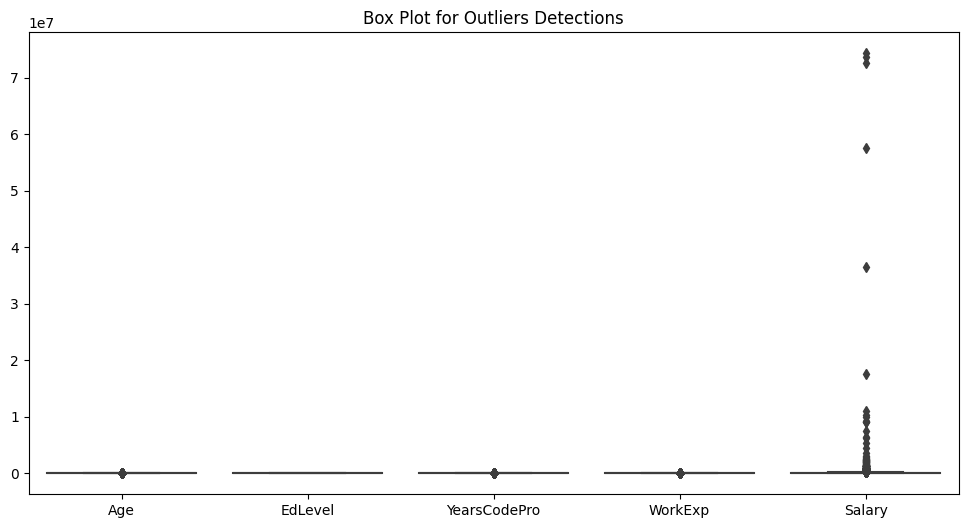

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data= survey_data)
plt.title('Box Plot for Outliers Detections')
plt.show()

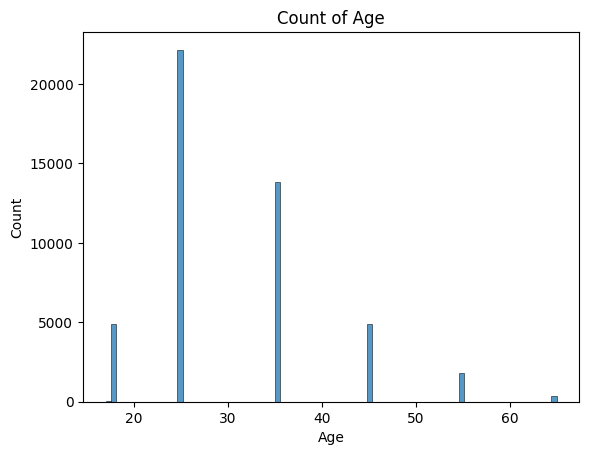

In [ ]:
sns.histplot(x= 'Age', data = survey_data)
plt.title("Count of Age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


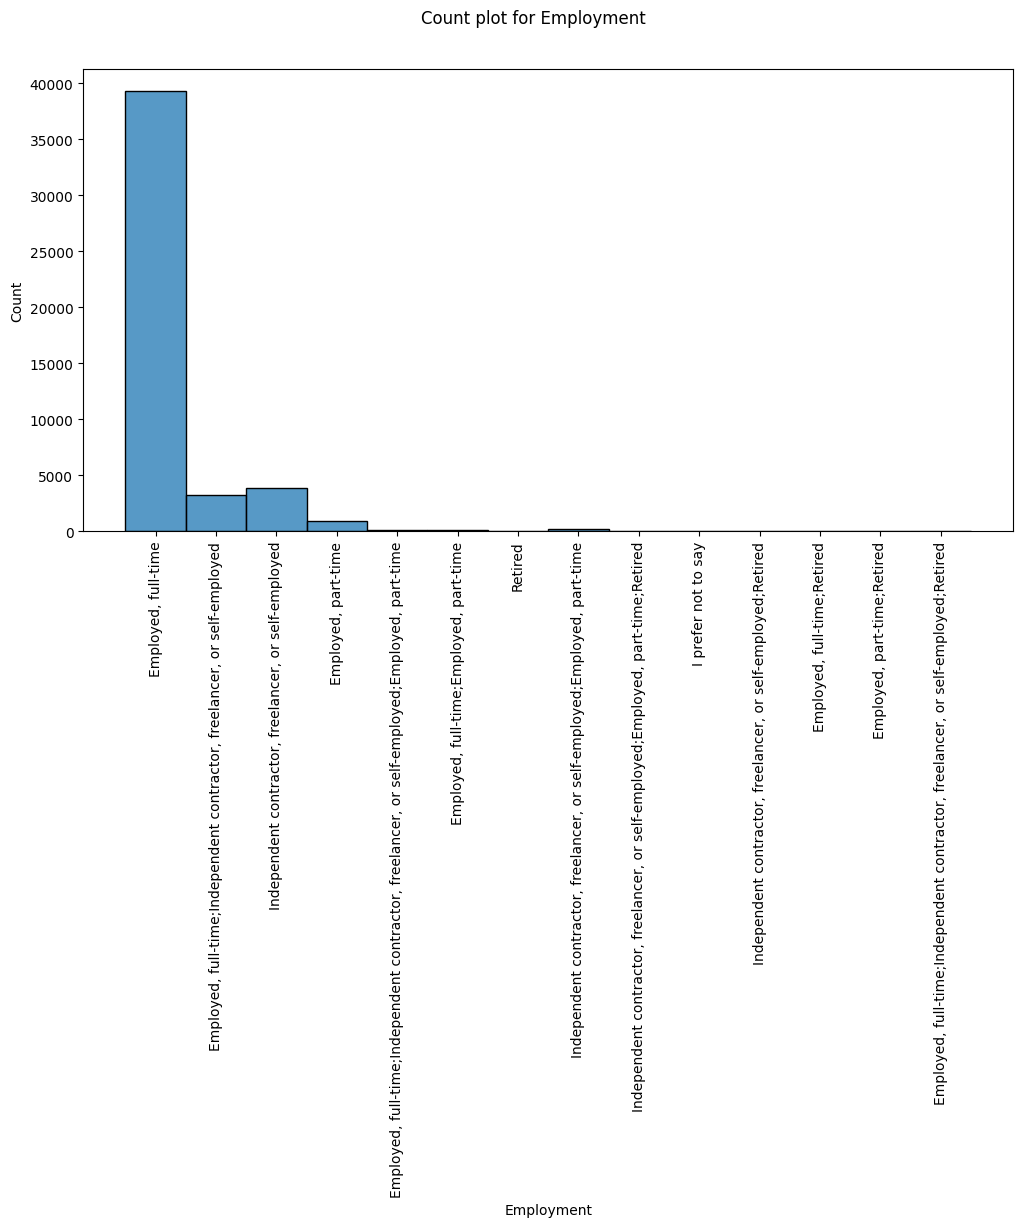

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='Employment',data =survey_data)
plt.suptitle('Count plot for Employment')
plt.xticks(rotation=90)
plt.show()

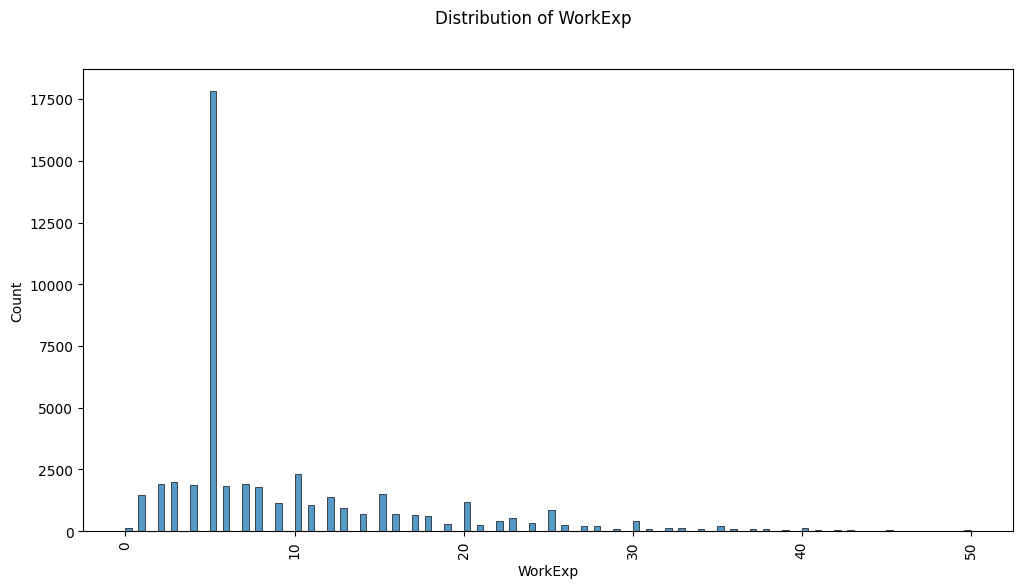

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='WorkExp',data =survey_data)
plt.suptitle('Distribution of WorkExp')
plt.xticks(rotation=90)
plt.show()

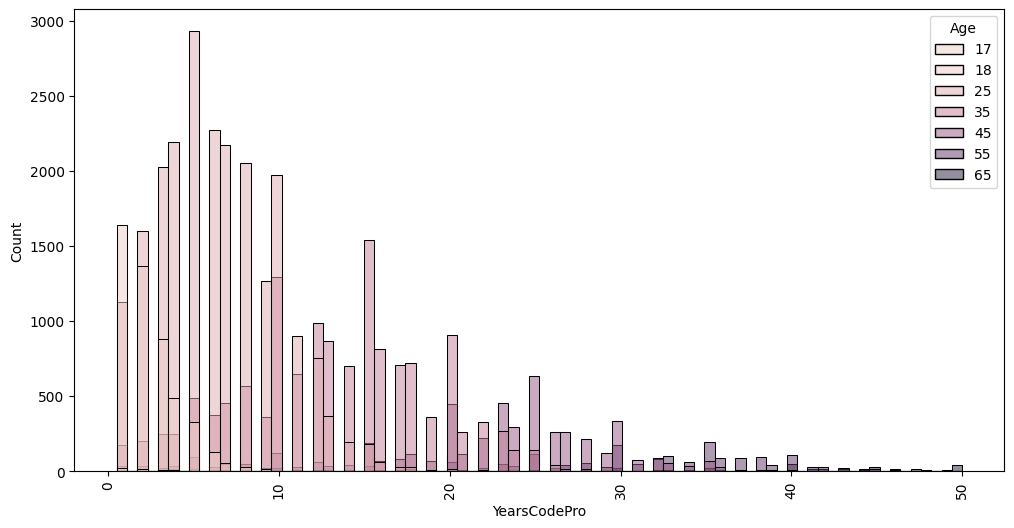

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data= survey_data, x='YearsCodePro', hue='Age')
plt.xticks(rotation=90)
plt.show()


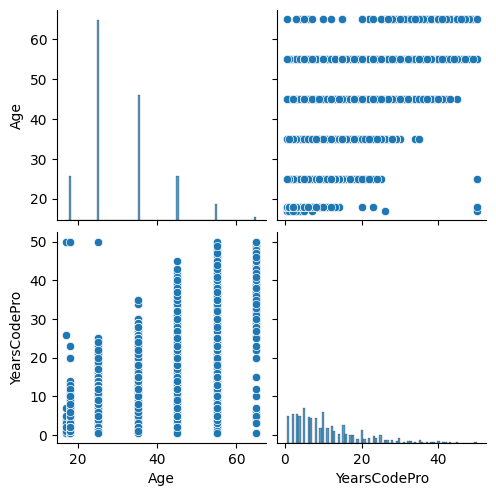

In [ ]:
sns.pairplot(survey_data[['Age','YearsCodePro', 'CompensationSalary']])

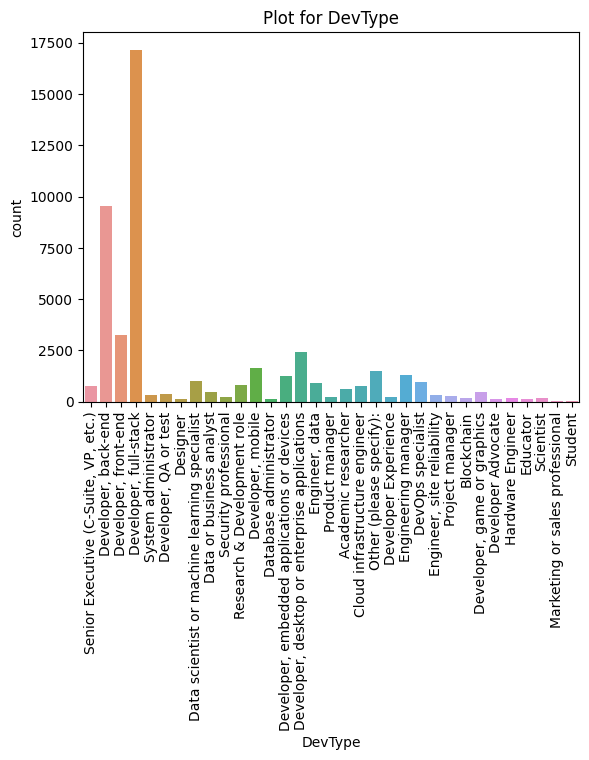

In [ ]:
sns.countplot(data= survey_data, x= 'DevType')
plt.title('Plot for DevType')
plt.xticks(rotation =90)
plt.show()

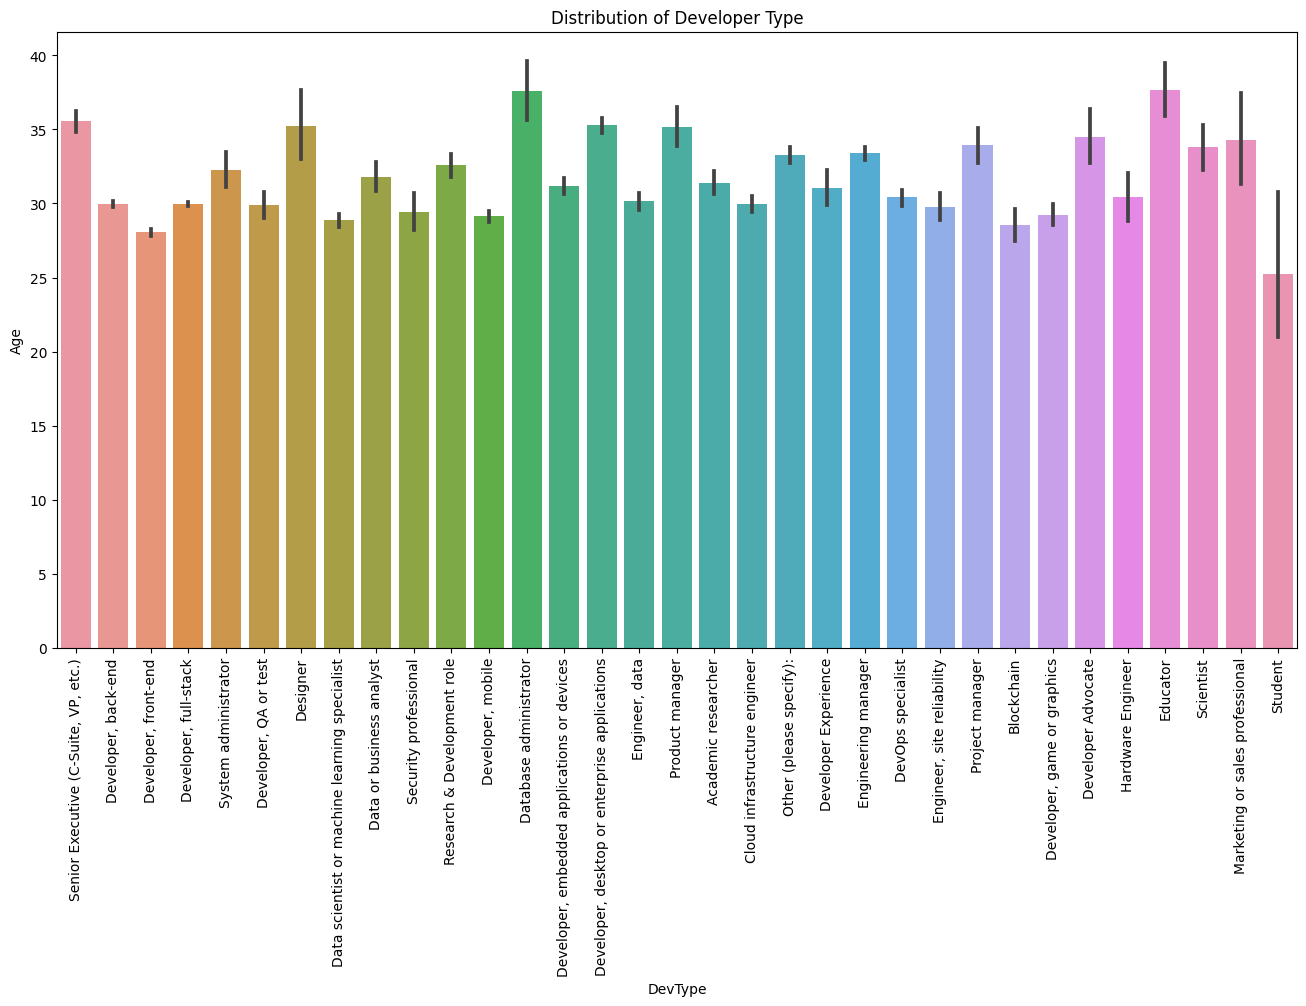

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data= survey_data,x ='DevType', y= 'Age')
plt.title("Distribution of Developer Type")
plt.xticks(rotation=90)
plt.show()

# Visualize the distribution of a Categorical attribute using  a Count plot




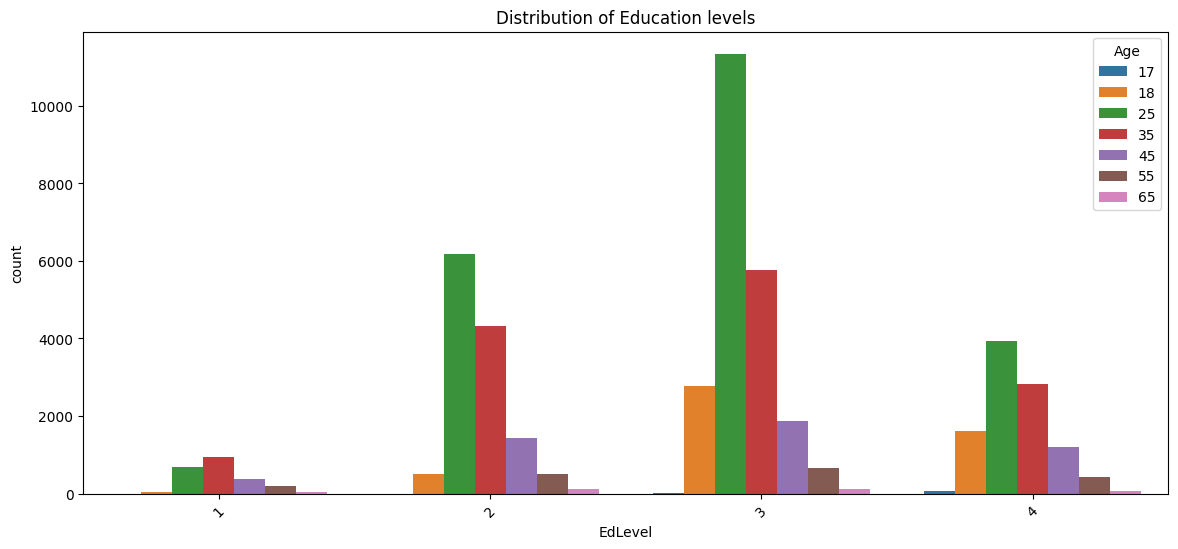

None


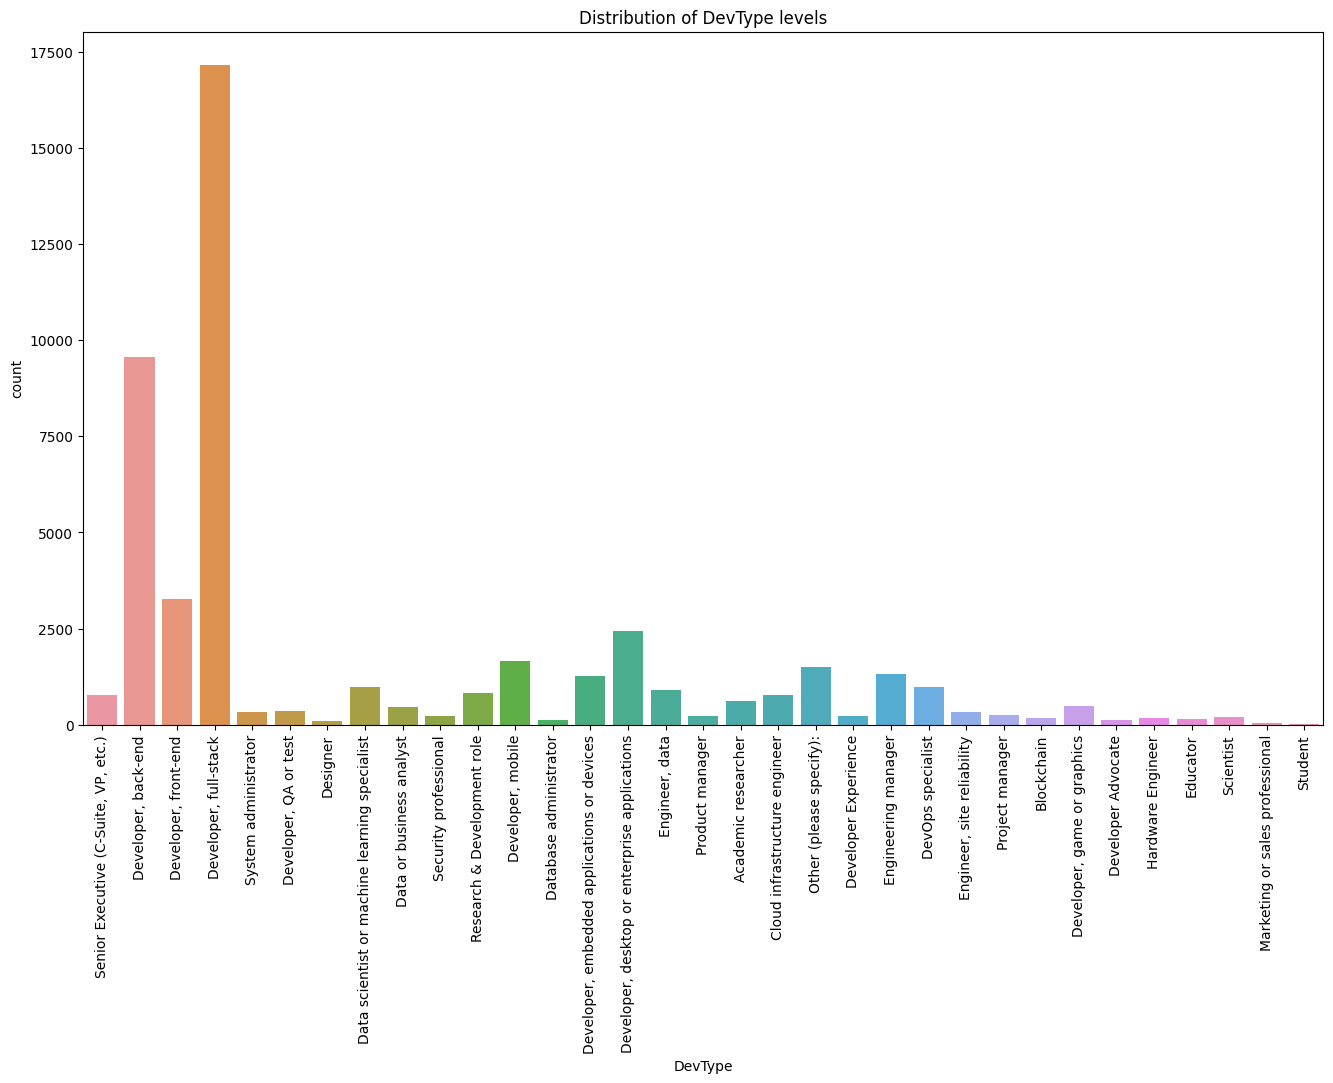

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x='EdLevel',data= survey_data, hue= 'Age')
plt.title("Distribution of Education levels")
plt.xticks(rotation=45)

print(plt.show())

plt.figure(figsize=(16,9))
sns.countplot(x='DevType',data= survey_data)
plt.title("Distribution of DevType levels")
plt.xticks(rotation=90)

plt.show()

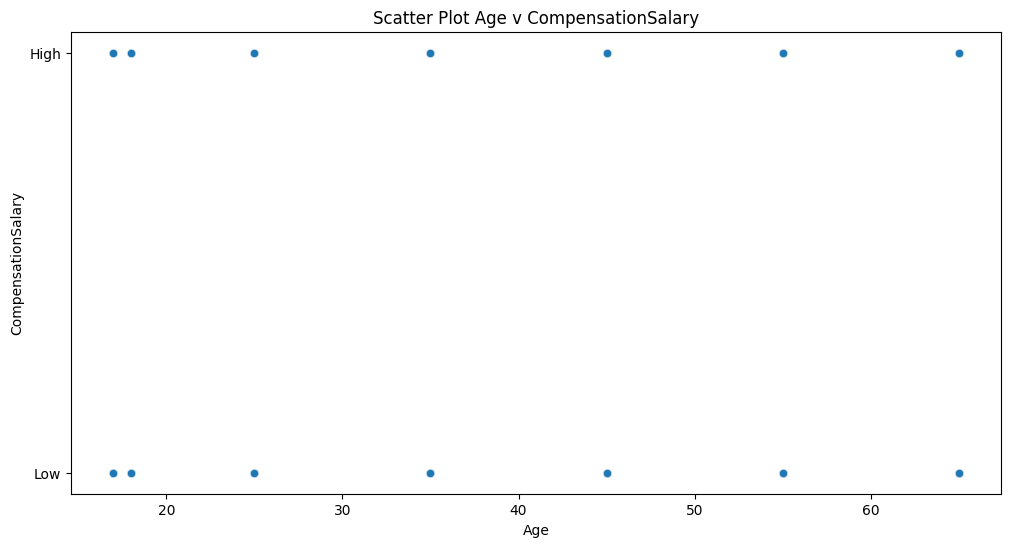

None


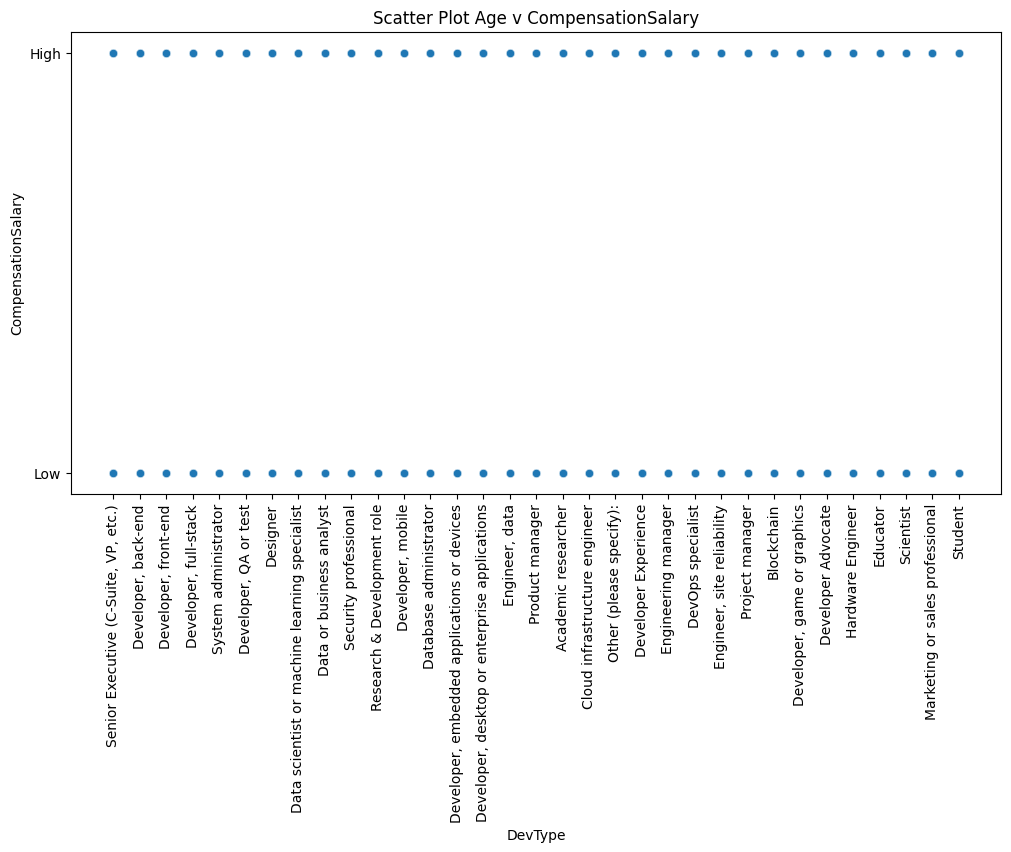

In [ ]:
# Scatter Plot for numeric feaures
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='CompensationSalary',data= survey_data , alpha=0.6)
plt.title("Scatter Plot Age v CompensationSalary")
print(plt.show())

plt.figure(figsize=(12,6))
sns.scatterplot(x='DevType',y='CompensationSalary',data= survey_data , alpha=0.6)
plt.title("Scatter Plot Age v CompensationSalary")
plt.xticks(rotation=90)
plt.show()

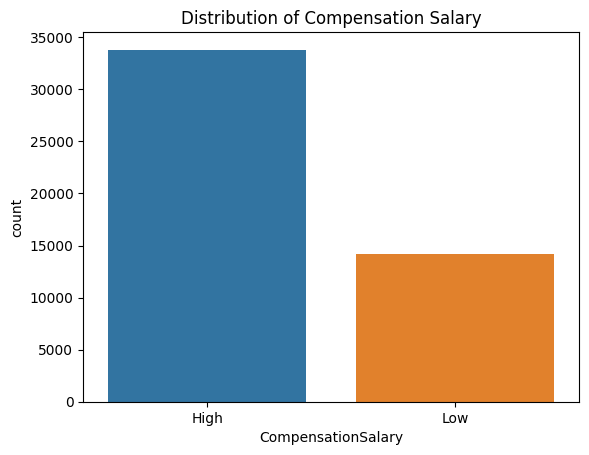

In [ ]:
sns.countplot(x = 'CompensationSalary', data=survey_data)
plt.title('Distribution of Compensation Salary')
plt.show()

In [ ]:
survey_data.isnull().sum()

Age                   0
Employment            0
RemoteWork            0
EdLevel               0
YearsCodePro          0
WorkExp               0
DevType               0
Country               0
ProfessionalTech      0
Salary                0
CompensationSalary    0
dtype: int64

## Data Transformation

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(survey_data[['Age', 'YearsCodePro']])
survey_data[['Age_new', 'YearsCodePro_new']] = imputer.transform(survey_data[['Age', 'YearsCodePro']])

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
survey_data[['Age_new', 'YearsCodePro_new']] = imputer.fit_transform((survey_data[['Age', 'YearsCodePro']]))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

obj_col = ['Employment','RemoteWork', 'DevType','WorkExp', 'Country', 'ProfessionalTech','CompensationSalary']
survey_data[obj_col]= survey_data[obj_col].apply(label_encoder.fit_transform)

survey_data

,Age,Employment,RemoteWork,EdLevel,YearsCodePro,WorkExp,DevType,Country,ProfessionalTech,Salary,CompensationSalary,Age_new,YearsCodePro_new
1,25,0,2,3,9.0,10,30,163,107,285000.0,0,25.0,9.0
2,45,0,0,3,23.0,23,11,163,123,250000.0,0,45.0,23.0
3,25,0,0,3,7.0,7,14,163,3,156000.0,0,25.0,7.0
4,25,2,2,3,4.0,6,15,119,207,23456.0,1,25.0,4.0
5,35,0,2,4,21.0,22,11,161,142,96828.0,0,35.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89162,35,0,2,2,24.0,25,11,21,7,50719.0,0,35.0,24.0
89166,18,2,1,4,2.0,3,15,7,126,16917.0,1,18.0,2.0
89167,18,0,2,3,2.0,2,17,64,1,15752.0,1,18.0,2.0
89170,25,0,0,2,9.0,9,24,50,27,64254.0,0,25.0,9.0


In [ ]:
column_name = 'CompensationSalary'
column_0 = survey_data.pop(column_name)
survey_data.insert(0, column_name, column_0)
survey_data.head()

,CompensationSalary,Age,Employment,RemoteWork,EdLevel,YearsCodePro,WorkExp,DevType,Country,ProfessionalTech,Salary,Age_new,YearsCodePro_new
1,0,25,0,2,3,9.0,10,30,163,107,285000.0,25.0,9.0
2,0,45,0,0,3,23.0,23,11,163,123,250000.0,45.0,23.0
3,0,25,0,0,3,7.0,7,14,163,3,156000.0,25.0,7.0
4,1,25,2,2,3,4.0,6,15,119,207,23456.0,25.0,4.0
5,0,35,0,2,4,21.0,22,11,161,142,96828.0,35.0,21.0


In [ ]:
X = survey_data.iloc[:,1:10]
y = survey_data.iloc[:,0]
print(X [0:5])
print(y[0:5])

   Age  Employment  RemoteWork  EdLevel  YearsCodePro  WorkExp  DevType  \
1   25           0           2        3           9.0       10       30   
2   45           0           0        3          23.0       23       11   
3   25           0           0        3           7.0        7       14   
4   25           2           2        3           4.0        6       15   
5   35           0           2        4          21.0       22       11   

   Country  ProfessionalTech  
1      163               107  
2      163               123  
3      163                 3  
4      119               207  
5      161               142  
1    0
2    0
3    0
4    1
5    0
Name: CompensationSalary, dtype: int64


**Cluster Analysis:  K-Means, Heirarchical Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the Dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Normalisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

# K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
kmeans_labels_train = kmeans.labels_
kmeans_labels_test = kmeans.predict(X_test)

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels_train = agg_clustering.fit_predict(X_train)
agg_labels_test = agg_clustering.fit_predict(X_test)

# Evaluation metrics for clustering
kmeans_score = metrics.silhouette_score(X_train, kmeans_labels_train)
agg_score = metrics.silhouette_score(X_train, agg_labels_train)

print(kmeans_score)
print(agg_score)

0.23053217779695576
0.19538874208044493


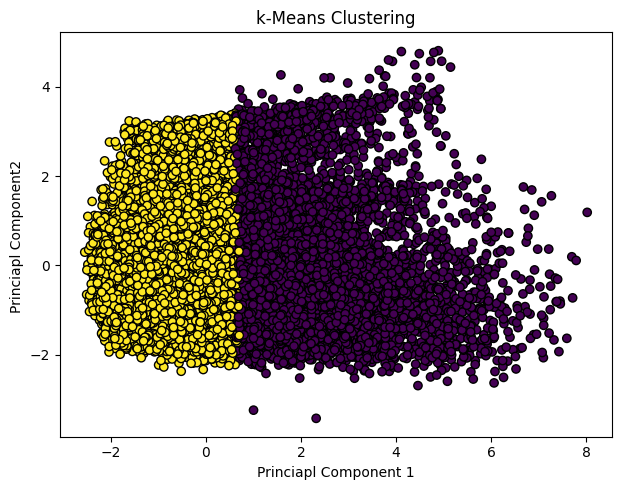

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot for K-Means Cluster
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=kmeans_labels_train, edgecolor='k')
plt.title('k-Means Clustering')
plt.xlabel('Princiapl Component 1')
plt.ylabel('Princiapl Component2 ')
plt.tight_layout()
plt.show()

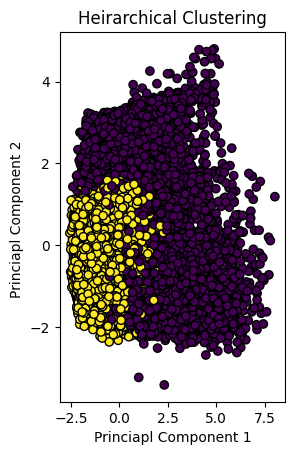

In [ ]:
# Plot for Herirarchical Clustering
plt.subplot(1,2,1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=agg_labels_train, edgecolor='k')
plt.title('Heirarchical Clustering')
plt.xlabel('Princiapl Component 1')
plt.ylabel('Princiapl Component 2 ')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X_train, method='ward', metric='euclidean')

dendrogram(linkage_data, orientation='top', labels=np.array(range(len(X_train))))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

## Linear Regression Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Run k=1 through 25 and record testing accuracy
k_list = []
scores_list = []

for k in range(1,26):
        knn = KNeighborsClassifier(n_neighbors=k,weights="distance", metric="euclidean")
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        k_list.append(k)
        accuracy = metrics.accuracy_score(y_test,y_pred)
        print(k, 'accuracy',accuracy)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

# Metrics for Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

1 accuracy 0.7717232756824338
2 accuracy 0.7750573036049176
3 accuracy 0.7919358199624922
4 accuracy 0.7979787455719942
5 accuracy 0.7993331944155032
6 accuracy 0.806001250260471
7 accuracy 0.8040216711814961
8 accuracy 0.8070431339862472
9 accuracy 0.8061054386330485
10 accuracy 0.8080850177120233
11 accuracy 0.8054803083975828
12 accuracy 0.8083975828297562
13 accuracy 0.8077724525942904
14 accuracy 0.8092310898103772
15 accuracy 0.8066263804959366
16 accuracy 0.8083975828297562
17 accuracy 0.8076682642217129
18 accuracy 0.8098562200458429
19 accuracy 0.8099604084184205
20 accuracy 0.8092310898103772
21 accuracy 0.8078766409668681
22 accuracy 0.8097520316732653
23 accuracy 0.8091269014377995
24 accuracy 0.8089185246926442
25 accuracy 0.8085017712023338
Mean Absolute Error: 0.19149822879766618
Mean Squared Error: 0.19149822879766618


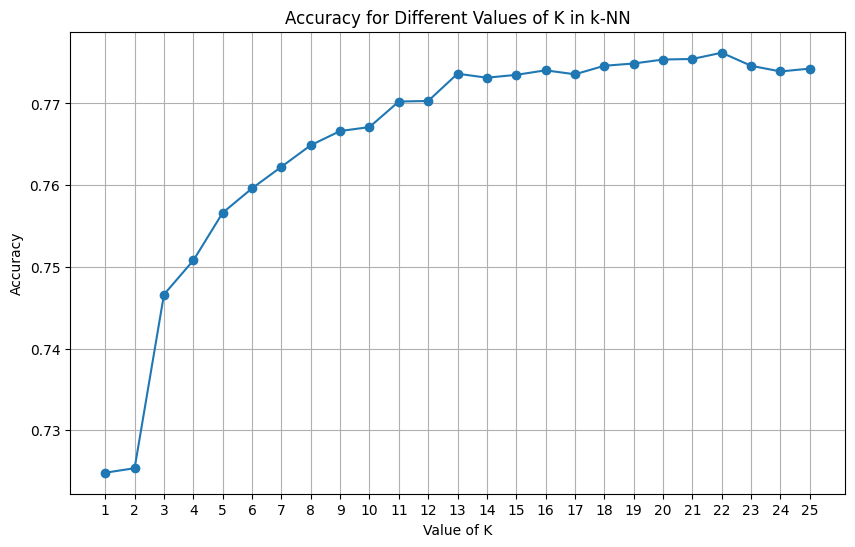

In [ ]:
# Plotting accuracy for k-NN
plt.figure(figsize=(10,6))
plt.plot(k_list, scores_list, marker='o')
plt.title('Accuracy for Different Values of K in k-NN')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_list)
plt.grid(True)
plt.show()

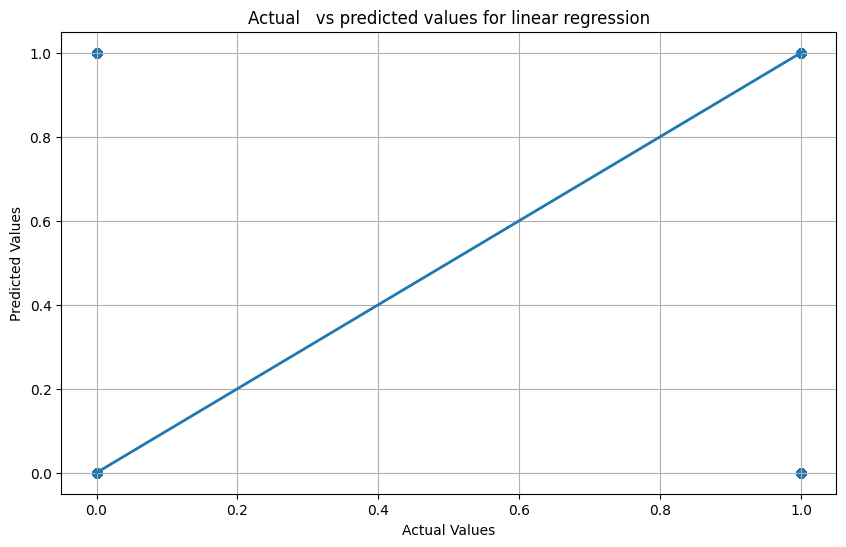

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],linewidth=2)
plt.title('Actual   vs predicted values for linear regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

# Splitting the Dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Train a RandomForestClassifier
dt_classifier= DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predication on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evalute the model and get the classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classsification Report:', classification_report(y_test, y_pred))

# Calculate the F1 Score
f1 = f1_score(y_test, y_pred_dt, average = 'weighted')
print('F1 Score: ', f1)

Accuracy: 0.7742585260818226
Classsification Report:               precision    recall  f1-score   support

           0       0.79      0.92      0.85     10217
           1       0.68      0.42      0.52      4180

    accuracy                           0.77     14397
   macro avg       0.74      0.67      0.69     14397
weighted avg       0.76      0.77      0.76     14397

F1 Score:  0.7963918883946071


In [ ]:
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train,y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#Build a decision tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier ( criterion ='gini', max_depth =3)
clf = clf.fit( X_train,y_train)

In [ ]:
#Build a decision tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier ( criterion ='gini', max_depth =20)
clf = clf.fit( X_train,y_train )

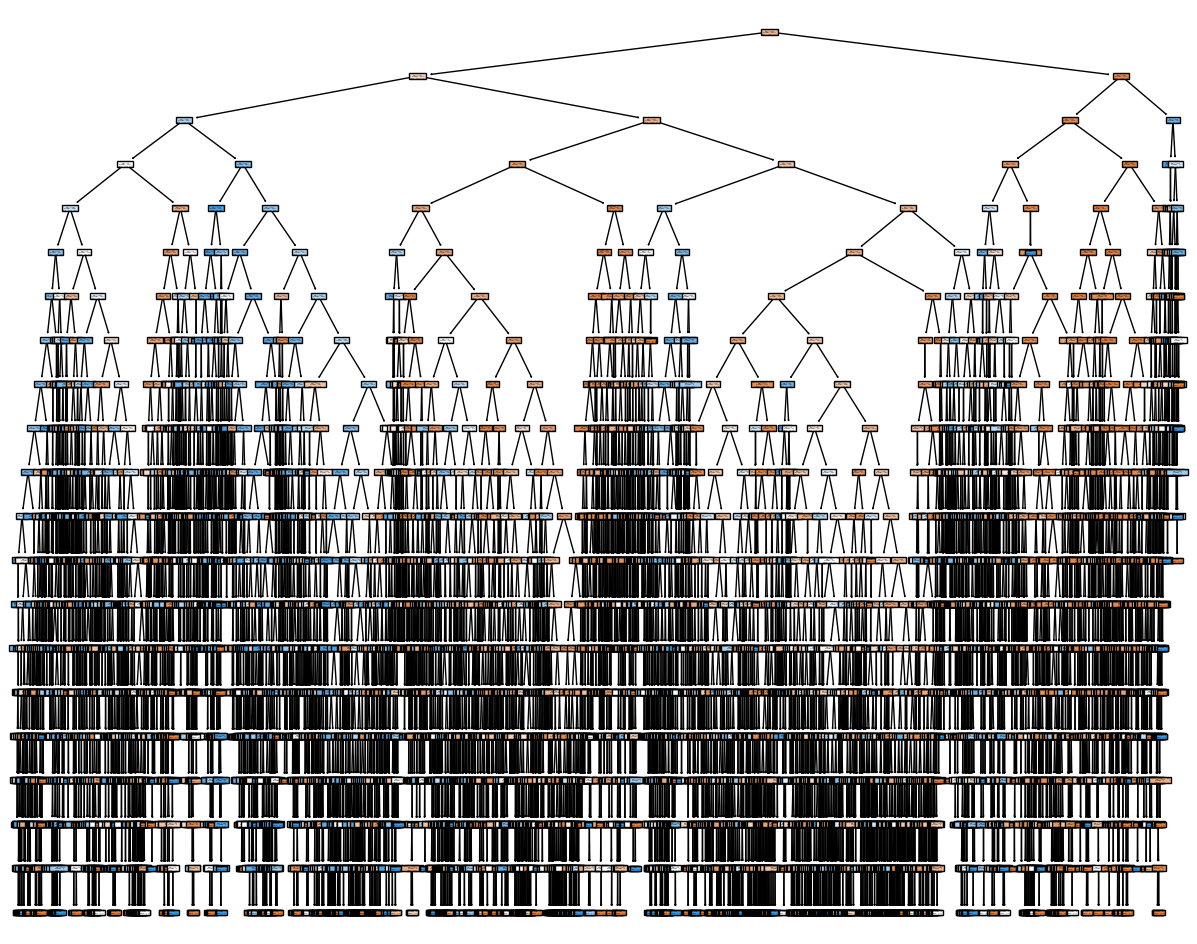

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15, 12))
_ = tree.plot_tree(clf, feature_names=survey_data.columns.tolist(), filled=True)
plt.show()

In [ ]:
from  sklearn.linear_model  import LogisticRegression
clf  =  LogisticRegression()
clf  =  clf.fit(X_train , y_train )
clf.get_params ()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

array([[0.375     , 0.        , 0.        , ..., 0.75      , 0.70588235,
        0.43542435],
       [0.02083333, 0.15384615, 0.        , ..., 0.09375   , 0.12352941,
        0.9298893 ],
       [0.375     , 0.        , 1.        , ..., 0.46875   , 0.95882353,
        0.40221402],
       ...,
       [0.16666667, 0.        , 0.        , ..., 0.34375   , 0.56470588,
        0.9298893 ],
       [0.375     , 0.        , 1.        , ..., 0.46875   , 0.56470588,
        0.9298893 ],
       [0.375     , 0.        , 0.        , ..., 0.46875   , 0.86470588,
        0.01107011]])

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create LogisticRegression object
clf = LogisticRegression(max_iter =2000, random_state=10)

# Train LogisticRegression Classifer
clf = clf.fit(X_train,y_train)
clf

LogisticRegression(max_iter=2000, random_state=10)

In [ ]:
y_pred = clf.predict(X_test)
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7400152809613114


In [ ]:
developers_coe = pd.DataFrame(zip(X.columns, np.transpose(clf.coef_.tolist()[0])), columns=['features', 'coefficient']) # create a dataframe
developers_coe_row = pd.DataFrame({'features':['intercept'],'coefficient' : [clf.intercept_.tolist()[0]]})
developers_coe = pd.concat([developers_coe, developers_coe_row], ignore_index=True) # append a new row
developers_coe

,features,coefficient
0,Age,-0.456555
1,Employment,0.530223
2,RemoteWork,-0.017617
3,EdLevel,0.701294
4,YearsCodePro,-4.291901
5,WorkExp,-0.800792
6,DevType,-0.203700
7,Country,-1.339978
8,ProfessionalTech,0.564487
9,intercept,0.184552


In [ ]:
clf1 = LogisticRegression(max_iter =1000, penalty ='l1', solver ='liblinear')
clf2 = LogisticRegression(max_iter =2000, penalty ='l2', solver ='saga')
clf1
clf2

LogisticRegression(max_iter=2000, solver='saga')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[9255,  962],
       [1493, 2687]])

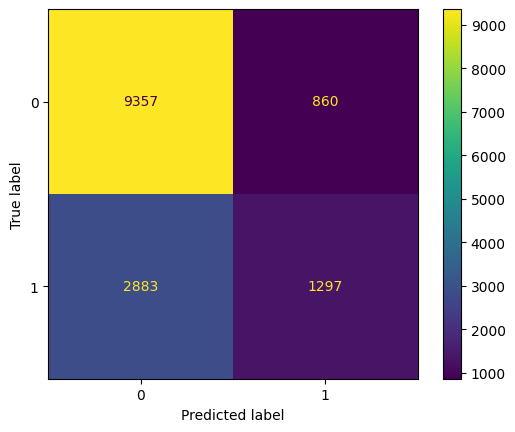

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test,y_test)
disp

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8294783635479613

In [ ]:
error_rate = 1 - metrics.accuracy_score(y_test, y_pred)
error_rate

0.17052163645203866

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.6428229665071771
Specificity: 0.9058432025056279


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the Dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Train a RandomForestClassifier
clf= RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predication on the test set
y_pred = clf.predict(X_test)

# Evalute the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classsification Report:', classification_report(y_test, y_pred))

Accuracy: 0.8288532333124956
Classsification Report:               precision    recall  f1-score   support

           0       0.86      0.91      0.88     10217
           1       0.74      0.64      0.69      4180

    accuracy                           0.83     14397
   macro avg       0.80      0.77      0.78     14397
weighted avg       0.82      0.83      0.83     14397



In [ ]:
from  sklearn.metrics  import  classification_report
y_pred  =  clf.predict( X_test)
report  =  classification_report (y_test , y_pred )

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

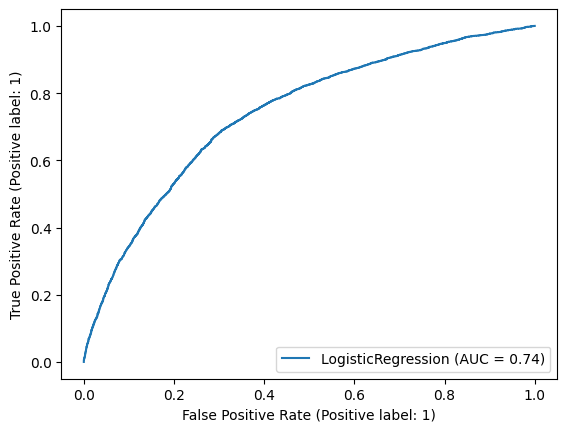

In [ ]:
from sklearn.metrics import RocCurveDisplay

clf_lr = RocCurveDisplay.from_estimator(clf_lr,X_test,y_test)
clf_lr

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

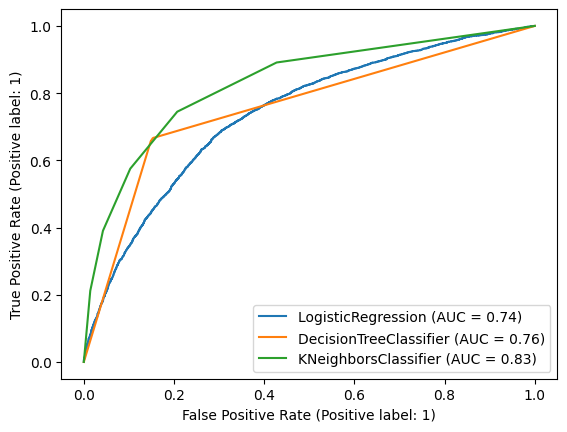

In [ ]:
from  sklearn . metrics  import RocCurveDisplay
clf_lr = LogisticRegression()
clf_dt = DecisionTreeClassifier()
clf_knn = KNeighborsClassifier()
clf_lr.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)
roc_lr  = RocCurveDisplay.from_estimator(clf_lr,X_test,y_test)
roc_dt  = RocCurveDisplay.from_estimator( clf_dt,X_test,y_test,ax= roc_lr.ax_)  # plot  in  the  same  ax
roc_knn  = RocCurveDisplay.from_estimator( clf_knn,X_test,y_test,ax=roc_lr.ax_)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size =0.2,random_state =4)
X_train_new,X_val,y_train_new,y_val = train_test_split(X_train,y_train,test_size =0.1,random_state =4)

In [ ]:
max_depth_range = range(1,16)
val_results = []
train_results = []

In [ ]:
for k in max_depth_range:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf_2 = DecisionTreeClassifier(max_depth=k)

    # Fit the model to the training data
    clf_2.fit(X_train_new, y_train_new)

    # Predict and evaluate on the training data
    pred_train_new = clf_2.predict(X_train_new)
    train_score = metrics.accuracy_score(y_train_new, pred_train_new)
    train_results.append(train_score)

    # Predict and evaluate on the validation data
    pred_val = clf_2.predict(X_val)
    val_score = metrics.accuracy_score(y_val, pred_val)
    val_results.append(val_score)

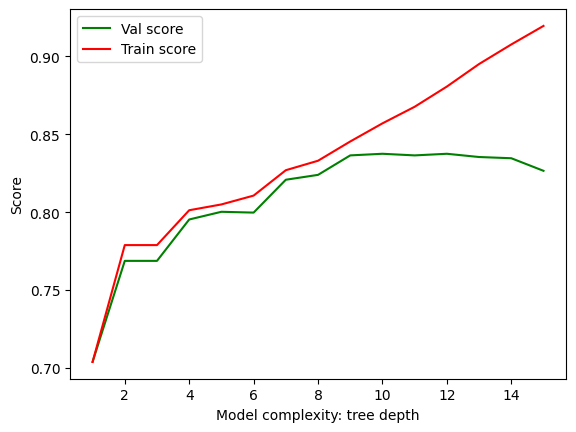

In [ ]:
plt.plot(max_depth_range, val_results, 'g-', label='Val score')
plt.plot(max_depth_range, train_results, 'r-', label='Train score')
plt.ylabel('Score')
plt.xlabel('Model complexity: tree depth')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Assuming X_train, y_train, X_test, and y_test are already defined
clf_best1 = DecisionTreeClassifier(max_depth=2)
clf_best1.fit(X_train, y_train)
y_pred = clf_best1.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.7778703896645135


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier object
clf_31 = DecisionTreeClassifier()

# Define the parameter grid
param_grid = [{'criterion': ['gini'], 'max_depth': list(range(1, 16))},
              {'criterion': ['entropy'], 'max_depth': list(range(1, 16))}]

# Create a grid search object
gs = GridSearchCV(clf_31, param_grid, scoring='accuracy', cv=10)

In [ ]:
# @title Default title text
gs = gs.fit(X_train, y_train)

# Set the classifier to the best combination of parameters found by GridSearchCV
clf_best3 = gs.best_estimator_

# Print the best model's parameters
print("Best model parameters:", clf_best3.get_params())

# Fit the best model to the training data
# This step might be redundant as GridSearchCV already returns the best model fitted to the training data
clf_best3.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_best3.predict(X_test)

# Print the accuracy score of the predictions
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

Best model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy score: 0.8316315899145655
